In [1]:
# Importing the Keras libraries and packages
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
dress_patterns_df = pd.read_csv('dress_patterns.csv')
dress_patterns = dress_patterns_df.values
dress_patterns_df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [3]:
print(os.listdir('dataset_category'))
print(os.listdir('dataset_category/animal'))

['animal', 'cartoon', 'chevron', 'floral', 'geometry', 'houndstooth', 'ikat', 'letter_numb', 'OTHER', 'plain', 'polka dot', 'scales', 'skull', 'squares', 'stars', 'stripes', 'tribal']
['851505476.jpg', '851505500.jpg', '851505502.jpg', '851505510.jpg', '851505618.jpg', '851505668.jpg', '851505905.jpg', '851505952.jpg', '851505967.jpg', '851506107.jpg', '851506149.jpg', '851506294.jpg', '851506312.jpg', '851506327.jpg', '851506342.jpg', '851506347.jpg', '851506375.jpg', '851506516.jpg', '851506519.jpg', '851506547.jpg', '851506556.jpg', '851506566.jpg', '851506616.jpg', '851506728.jpg', '851506836.jpg', '851506875.jpg', '851506933.jpg', '851506960.jpg', '851506974.jpg', '851507017.jpg', '851507033.jpg', '851507038.jpg', '851507064.jpg', '851507105.jpg', '851507127.jpg', '851507134.jpg', '851507198.jpg', '851507211.jpg', '851507216.jpg', '851507220.jpg', '851507284.jpg', '851507458.jpg', '851507677.jpg', '851507680.jpg', '851507702.jpg', '851507724.jpg', '851507841.jpg', '851507938.jpg',

In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 17, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset_category',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset_category_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6323 images belonging to 17 classes.
Found 3747 images belonging to 17 classes.


In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [8]:
num_epochs = 50  # Increased number of epochs for better convergence
steps_per_epoch = 1000  # Adjusted steps per epoch based on dataset size
validation_steps = 250  # Adjusted validation steps based on dataset size

# Create generator functions to repeat a subset of the datasets
def repeat_generator(generator, num_repeats):
    for _ in range(num_repeats):
        for data in generator:
            yield data

# Generate a subset of the training and test sets
subset_training_set = repeat_generator(training_set, num_epochs)
subset_test_set = repeat_generator(test_set, num_epochs)

# Calculate the number of steps per epoch based on dataset size
num_training_samples = 15000  # Approximate number of training samples
batch_size = 32  # Adjust batch size as needed
steps_per_epoch = num_training_samples // batch_size

# Calculate the number of validation steps based on dataset size
num_test_samples = 5000  # Approximate number of test samples
validation_steps = num_test_samples // batch_size

# Fit the model using the subset datasets
history = classifier.fit_generator(
    subset_training_set,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=subset_test_set,
    validation_steps=validation_steps
)

# Evaluate the model on the test set
test_loss, test_accuracy = classifier.evaluate(test_set, steps=validation_steps)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


C:\Users\hp\AppData\Local\Temp\ipykernel_16580\2593875025.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/30
468/468 [==============================] - 419s 898ms/step - loss: 0.1187 - accuracy: 0.6164 - val_loss: 0.1207 - val_accuracy: 0.5912
Epoch 2/30
468/468 [==============================] - 456s 975ms/step - loss: 0.1149 - accuracy: 0.6272 - val_loss: 0.1143 - val_accuracy: 0.6174
Epoch 3/30
468/468 [==============================] - 311s 666ms/step - loss: 0.1111 - accuracy: 0.6351 - val_loss: 0.1097 - val_accuracy: 0.6263
Epoch 4/30
468/468 [==============================] - 348s 744ms/step - loss: 0.1066 - accuracy: 0.6490 - val_loss: 0.1106 - val_accuracy: 0.6210
Epoch 5/30
468/468 [==============================] - 293s 627ms/step - loss: 0.1021 - accuracy: 0.6592 - val_loss: 0.0974 - val_accuracy: 0.6798
Epoch 6/30
468/468 [==============================] - 288s 616ms/step - loss: 0.0977 - accuracy: 0.6722 - val_loss: 0.0974 - val_accuracy: 0.6842
Epoch 7/30
468/468 [==============================] - 325s 696ms/step - loss: 0.0941 - accuracy: 0.6830 - val_loss: 0.0851 -

KeyboardInterrupt: 

In [9]:
# Save Model to Disk
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


In [10]:
os.listdir('dataset_category_test/plain')

['851505459.jpg',
 '851505461.jpg',
 '851505464.jpg',
 '851505465.jpg',
 '851505467.jpg',
 '851505469.jpg',
 '851505470.jpg',
 '851505473.jpg',
 '851505474.jpg',
 '851505479.jpg',
 '851505481.jpg',
 '851505482.jpg',
 '851505486.jpg',
 '851505489.jpg',
 '851505496.jpg',
 '851505497.jpg',
 '851505501.jpg',
 '851505503.jpg',
 '851505504.jpg',
 '851505506.jpg',
 '851505507.jpg',
 '851505509.jpg',
 '851505512.jpg',
 '851505513.jpg',
 '851505519.jpg',
 '851505521.jpg',
 '851505523.jpg',
 '851505529.jpg',
 '851505531.jpg',
 '851505533.jpg',
 '851505534.jpg',
 '851505541.jpg',
 '851505542.jpg',
 '851505544.jpg',
 '851505547.jpg',
 '851505548.jpg',
 '851505551.jpg',
 '851505557.jpg',
 '851505562.jpg',
 '851505563.jpg',
 '851505565.jpg',
 '851505567.jpg',
 '851505574.jpg',
 '851505578.jpg',
 '851505579.jpg',
 '851505581.jpg',
 '851505583.jpg',
 '851505584.jpg',
 '851505585.jpg',
 '851505586.jpg',
 '851505590.jpg',
 '851505593.jpg',
 '851505594.jpg',
 '851505601.jpg',
 '851505602.jpg',
 '85150560

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('dataset_category_test/plain/851505531.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = classifier.predict(test_image)
training_set.class_indices


1/1 [==============================] - 0s 189ms/step


{'OTHER': 0,
 'animal': 1,
 'cartoon': 2,
 'chevron': 3,
 'floral': 4,
 'geometry': 5,
 'houndstooth': 6,
 'ikat': 7,
 'letter_numb': 8,
 'plain': 9,
 'polka dot': 10,
 'scales': 11,
 'skull': 12,
 'squares': 13,
 'stars': 14,
 'stripes': 15,
 'tribal': 16}

In [13]:
result[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [14]:
index = np.where(result[0] == 1)[0][0]
index

9

In [16]:
list(training_set.class_indices.keys())[list(training_set.class_indices.values()).index(index)]

'plain'

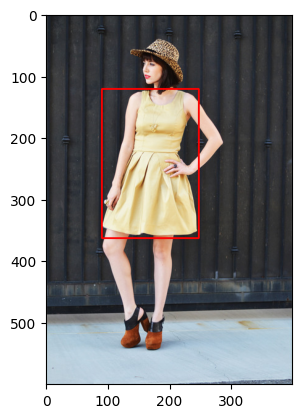

In [17]:
img = cv2.imread('dataset_category_test/plain/851505531.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))